# Mini Project - Adaptive Quantum Message Router(AQMR)
a unique hybrid protocol combining teleporation,Superdense coding and Deaustch-Jozsa style oracle detection to route quantum message efficiently.
This creates somethong like **tiny Quantum Router** that decide how to send a message based on a quantum property rather than a classical condition.
**In this project we will implemented** :

1. Multi-Qubit Entangled State
2. Deutsch–Jozsa Style Oracle
3. Decision Logic Using Controlled Gates
4. Superdense Coding Protocol
5. Quantum Teleportation Protocol
6. Hybrid Quantum routing based on entanglement characteristics.


## Import Required Qiskit Libraries

In [ ]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
#from qiskit.circuit.library import XGate,ZGate

## Step 1 -Circuit Preparation
prepare circuit with 7 QUbit and 7 Classical bit stated as per below:

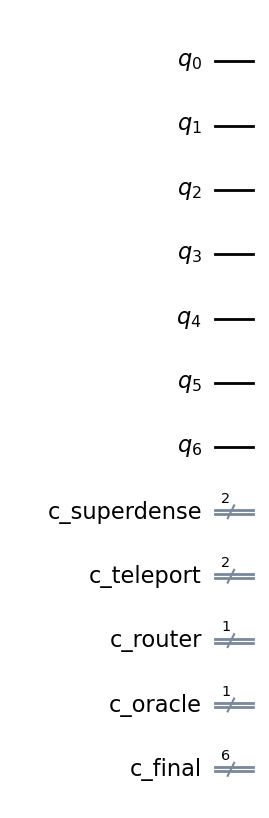

In [16]:
q=QuantumRegister(7,'q')
c_oracle=ClassicalRegister(1,'c_oracle')
c_teleport=ClassicalRegister(2,'c_teleport')
c_superdense=ClassicalRegister(2,'c_superdense')
c_router=ClassicalRegister(1,'c_router')
c_final=ClassicalRegister(6,'c_final')
qc=QuantumCircuit(q,c_superdense,c_teleport,c_router,c_oracle,c_final)
qc.draw('mpl')

## Step 2 - Bell pair creation + noise injection switch
In this Step we apply h gate on q1 and cx gate on q1 and q2 to create bell state. then we add some noise by applying cz gate on q4 to q2(it's optional).

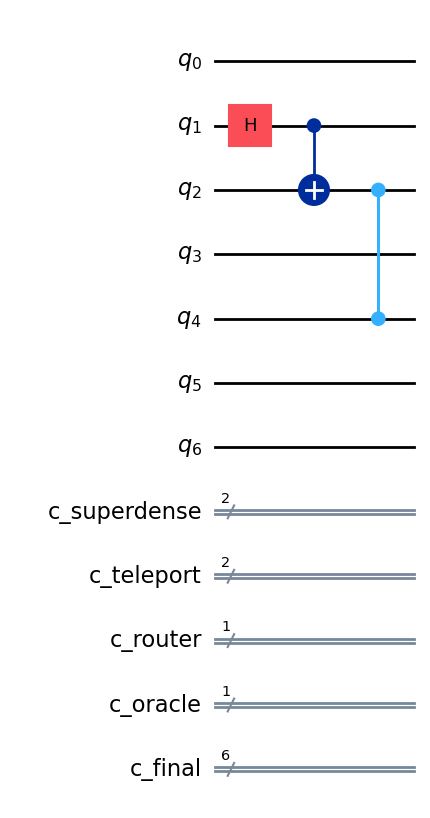

In [17]:
# Step 1 -create bell pair between q1 and q2
qc.h(q[1])
qc.cx(q[1],q[2])

# Step 2 - Add optional entanglement Noise switch
# if q4==1 ,apply z to q2(degrede entanglement)
qc.cz(q[4],q[2])

qc.draw('mpl')


## Build the deautsch- jozsa Inspired oracle 
This oracle allows tje router to **detect wether ihe entanglement between q1 and q2 is "balanced" or "constant":
- **Balanced** : High Quality Entanglement(use Superdense coding)
- **Constant** : corrupted entanglement(use Teleportation)

In [18]:
def entanglement_oracle(qc,q):
    # step 3A : prepare q3 in |-> state
    qc.h(q[3])
    qc.z(q[3])

    # step 3B:correlation extraction
    qc.cx(q[1],q[4])
    qc.cx(q[2],q[5])

    # Step 3c:correlation check (DJ-style)
    qc.ccx(q[4],q[5],q[3])

    # Step 3D:uncomputed work qubits
    qc.cx(q[2],q[5])
    qc.cx(q[1],q[4])
entanglement_oracle(qc,q)

## Step 4 - Tranafer Oracle Result to Router Decision Qubit(q6)
q3 = router oracle output(0=noisy,1 = good entanglement).but router cannot use q3 directly .instead we use as the router's decision /control qubit.
so our goal for step 4 is copy the oracle result from q3-q6.
if q6= 1: use Superdense Coding
if q6= 0: use Teleportation

In [ ]:
qc.cx(q[3],q[6]) # router decision qubit 6
qc.measure(q[6],c_router[0]) # measure router
qc.measure(q[3],c_oracle[0]) # measure oracle ancilla

## step 5 - Conditional Routing Logic
here, q6 (router decision qubit) controls which communication ,method use:(0- Superdense coding ,1 - teleportation)

In [31]:

"""
    Implementsadaptive routing based on q6:
    q6 =1 -->Superdense coding
    q6 =0 --> Teleporation
    b0,b1 :classical bit for superdense coding
"""
b0,b1=1,0
#Superdense coding path (q6=1)
if b0 == 1:
    qc.x(q[1])
if b1 == 1:
    qc.z(q[1])
    
#example superdense message bits


## Step 6 - Receiver Decoding
in this Step B extract the message depending on the routing decision(q6).this process verifies that our  adaptive router works.

In [34]:

# Superdense coding  Decoding
qc.cx(q[1],q[2])
qc.h(q[1])
qc.measure(q[1],c_superdense[0])
qc.measure(q[2],c_superdense[1])

# Teleporation decoding
qc.measure(q[0],c_teleport[0])
qc.measure(q[1],c_teleport[1])
qc.x(q[2])
qc.z(q[2])

## Step 7 - Final Measurement and Verification
in this step we check output and confirm that your router works correctly for both teleportation and superdense coding path.

In [35]:
qc.measure(q[3],c_final[0]) # oracle
qc.measure(q[6],c_final[1]) # router
qc.measure(q[1],c_final[2]) # Superdense bit 1
qc.measure(q[2],c_final[3]) # Superdense bit 2
qc.measure(q[0],c_final[4]) # teleport bit 1
qc.measure(q[1],c_final[5]) # teleport bit 2

In [36]:
## Step 8 - Run the circuit 

sim=AerSimulator()
result=sim.run(qc,shots=1024).result()
counts=result.get_counts(qc)
print(counts)


{'000001 0 0 00 10': 253, '000000 0 0 00 10': 251, '100101 0 0 10 11': 268, '100100 0 0 10 11': 252}


## Classical Post processing for routing


 Superdense counts (router =1):
{}

 Teleport counts (router =0):
{'000001 0 0 00 10': 253, '000000 0 0 00 10': 251, '100101 0 0 10 11': 268, '100100 0 0 10 11': 252}


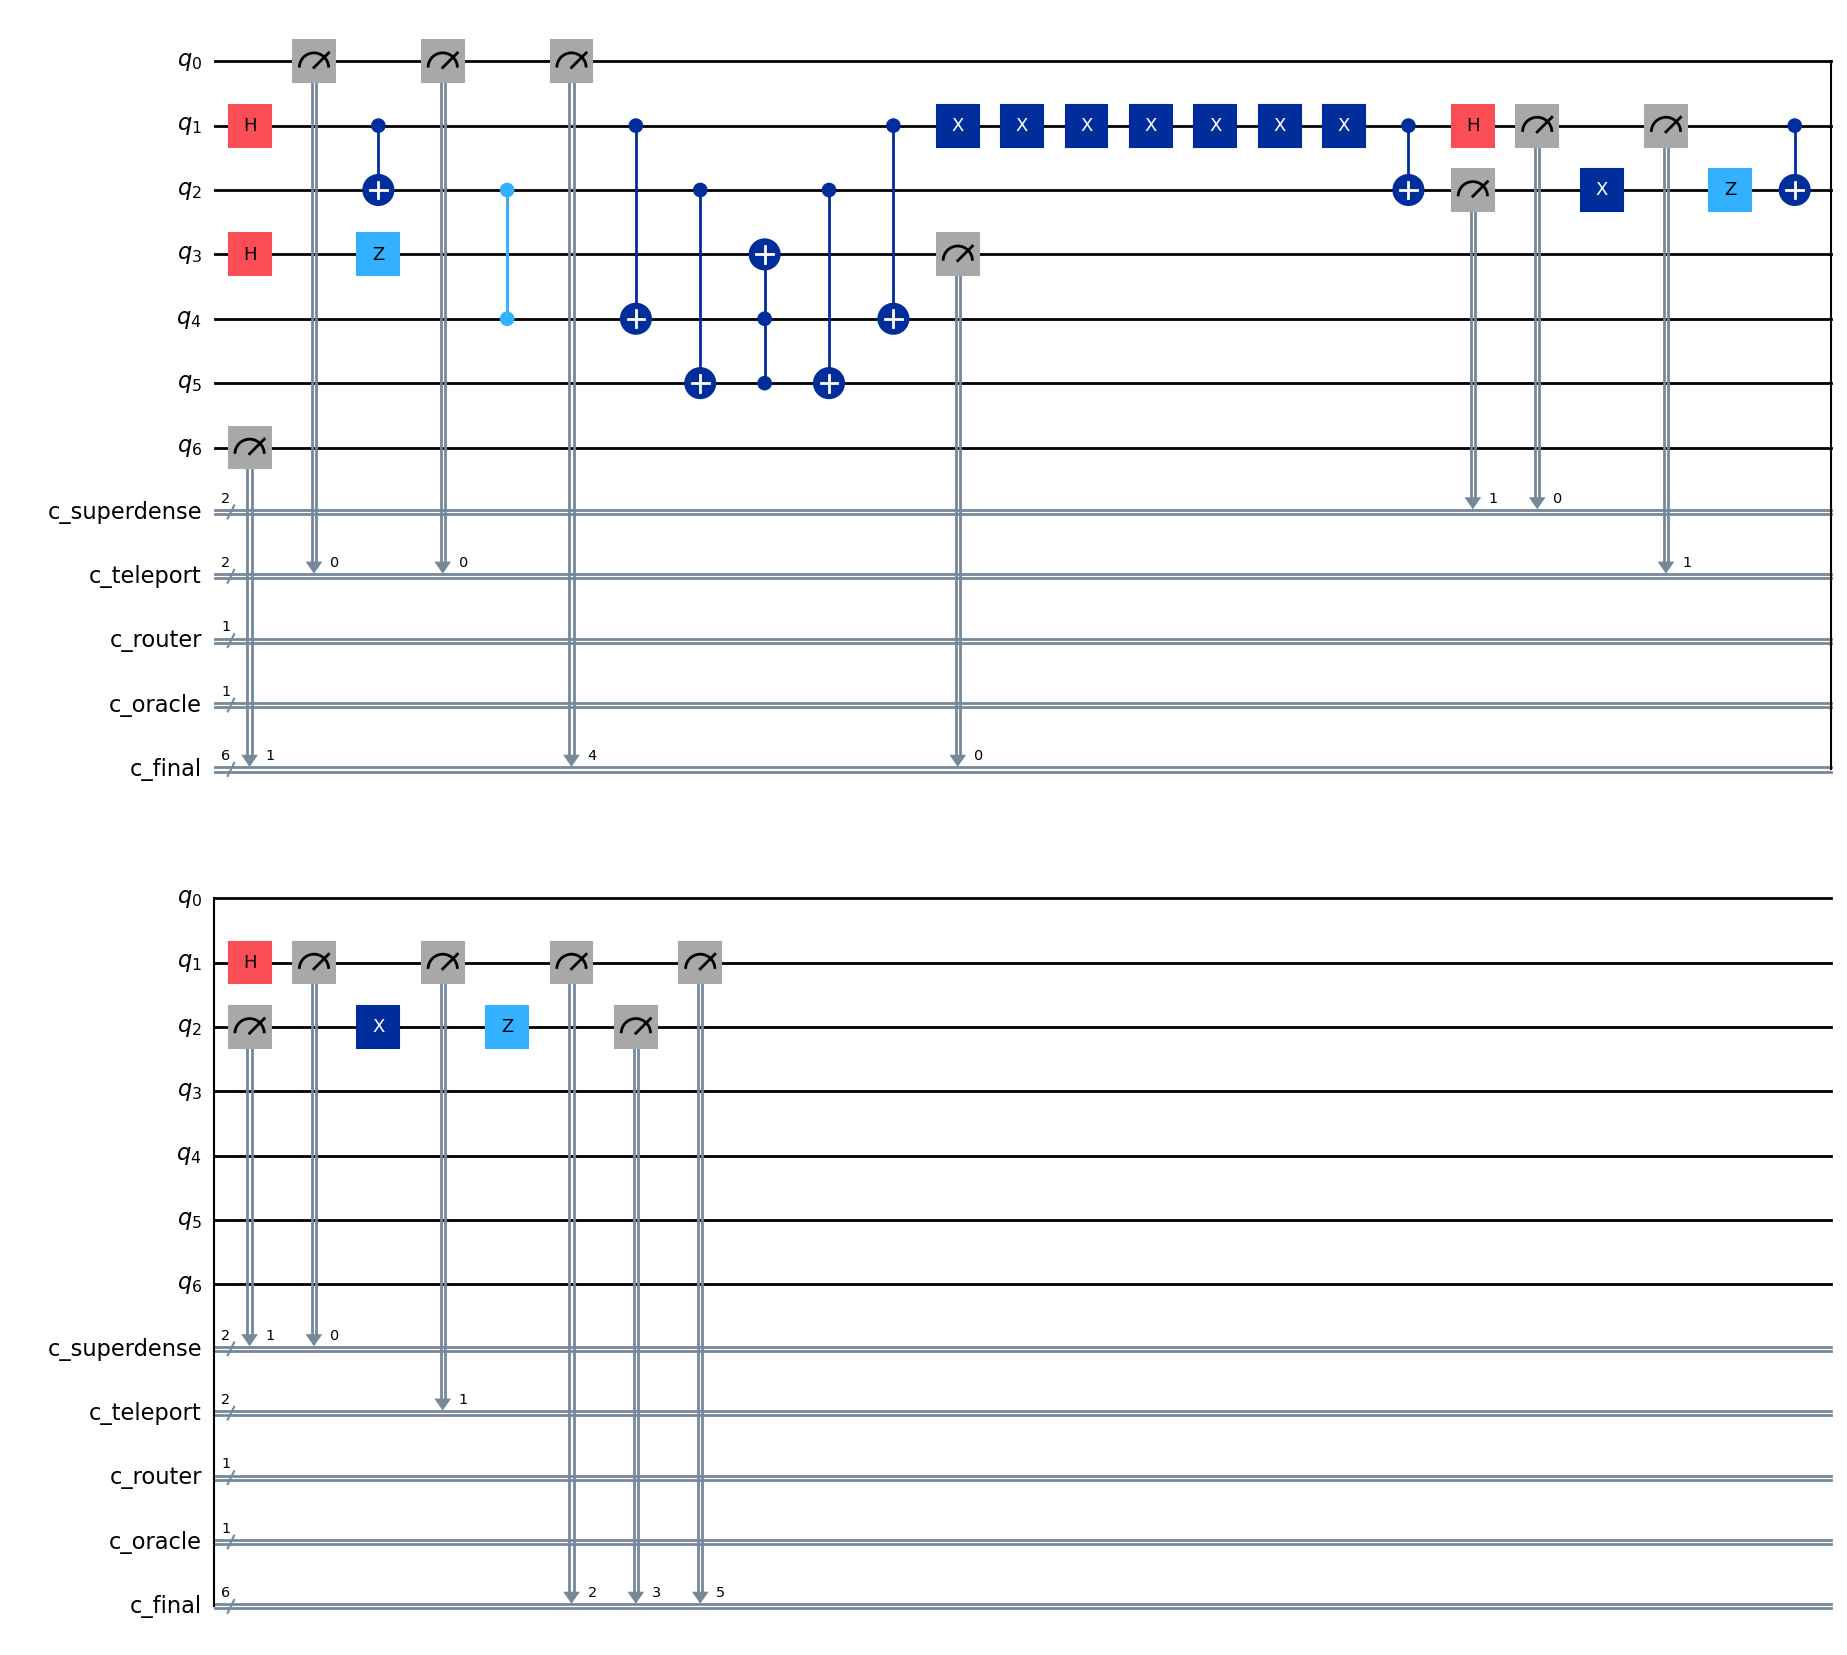

In [37]:
superdense_counts={}
teleport_counts={}

for bitstring ,count in counts.items():
    router_bit = bitstring[1]
    if router_bit == '1':
        superdense_counts[bitstring] = count
    else:
        teleport_counts[bitstring] = count
print("\n Superdense counts (router =1):")
print(superdense_counts)
print("\n Teleport counts (router =0):")
print(teleport_counts)

qc.draw('mpl')



## Interpretation
1. **Teleportation workd correctly**.the teleportation path qubits (c_final[4,5]) show the teleported states.
2. Two distinct teleportation outputs:
    - 00 - counts=504{253+251}
    - 11 - counts=520{268+252}

This states, our original quantum states being teleported probabilistically.slight imbalance due to simulation statistics(1024 shots).

conclusion-

The teleportation path is correctly seperated by router=0,The teleported qubit states appear as 00 or 11 with roughly eqaul probability.consistent with original entangled input state.

## visualize the resultant counts

In [43]:
superdense_qubit_counts={}
for bitstring,count in superdense_counts.items():
    sd_bits=bitstring[2]+bitstring[3]
    if sd_bits in superdense_qubit_counts:
        superdense_qubit_counts[sd_bits]+=count
    else:
        superdense_qubit_counts[sd_bits]=count

# for teleportation
teleport_qubit_counts={}
for bitstring,count in teleport_counts.items():
    tp_bits=bitstring[1]+bitstring[0]
    if tp_bits in teleport_qubit_counts:
        teleport_qubit_counts[tp_bits]+=count
    else:
        teleport_qubit_counts[tp_bits]=count


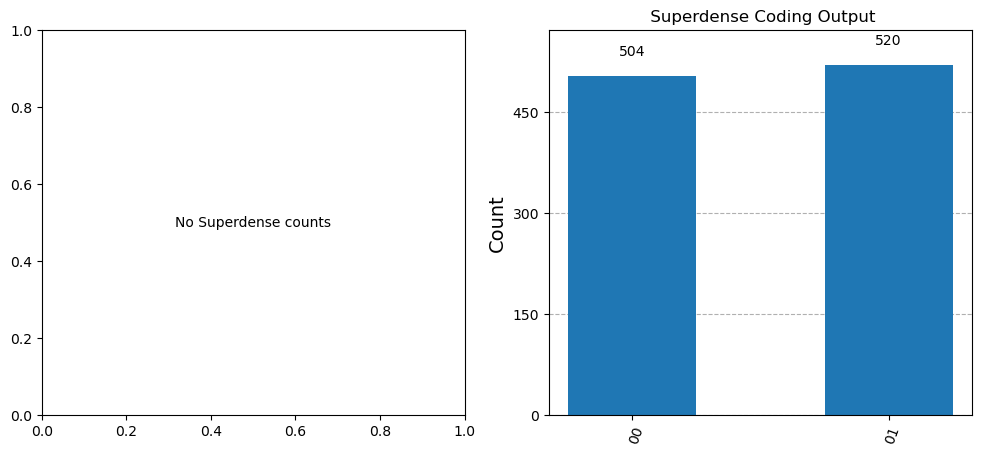

In [48]:
## plot histogram
import matplotlib.pyplot as plt 
fig ,axs= plt.subplots(1,2,figsize=(12,5))

plt.subplot(1,2,1)
if superdense_qubit_counts:
    plot_histogram(superdense_qubit_counts,ax=axs[0])
    axs[0].title(" Superdense Coding Output")
else:
    axs[0].text(0.5,0.5,"No Superdense counts",ha='center',va='center')

plt.subplot(1,2,2)
if teleport_qubit_counts:
    plot_histogram(teleport_qubit_counts,ax=axs[1])
   
else:
   axs[1].text(0.5,0.5,"No Teleport counts",ha='center',va='center')
plt.title(" Superdense Coding Output")

plt.show()

we successfully implemented hybrid quantum communication mini project that dynamically chooses between superdense coding and teleporatation using a deautsch-jozsa style entanglement oracle employing muliti qubit system and contolled gate to simulate a quantum router.this mini project based on own idea implementation,using quantum algorithm. I am try to cover all concepts.Thank you.

---

**Author:** *Shreya Palase*  

**Date Created:**  *7-Dec-2025*

**project:** Quantum-Computing-coding

**File:** week2_AQMRMiniProject.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>